In [1]:
using PyPlot

INFO: Recompiling stale cache file C:\Users\chris\.julia\lib\v0.5\BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file C:\Users\chris\.julia\lib\v0.5\PyCall.ji for module PyCall.
INFO: Recompiling stale cache file C:\Users\chris\.julia\lib\v0.5\PyPlot.ji for module PyPlot.


In [2]:
function findstate(state::Int,set::Array{Int})
    iimin=1
    iimax=length(set)
    
    if set[iimin] == state
        return iimin
    end
    if set[iimax] == state
        return iimax
    end
    
    
    found=false
    count=0
    
    while found==false && count < length(set)
        count+=1
        index=floor(Int,iimin+(iimax-iimin)/2)
        if state < set[index]
            iimax=index-1
        elseif state > set[index]
            iimin=index+1
        else
            found=true
            return index
        end
    end
    
    if found == false
        println("findstate never found a match")
        println("Are you sure the state is in that Array?")
    end
    
    return 0
end

findstate (generic function with 1 method)

In [3]:
n=12
nstates=2^n

4096

In [4]:
psi=collect(0:(nstates-1))

powers2=collect(0:(n-1));
powers2=2.^powers2;

mask=[0;powers2]+[powers2;0];
mask=[mask[2:end-1];[1+2^(n-1)]]

m=zeros(psi)
for i in 1:nstates
    m[i]=sum((psi[i]&powers2)./(powers2))
end
m=(m-n/2)/2

ind=sortperm(m)
m=m[ind]
psi=psi[ind]

ma=collect(0:.5:n/2.)-n/4
    
psia=Array{Array{Int64}}(n+1)
first=1
last=1
for i in 1:(n+1)
    psia[i]=psi[first:last]
    
    #now we compute them for the next round
    first=last+1
    last=last+binomial(n,i)
end

In [8]:
F=Array{Base.LinAlg.Eigen}(n+1)
for mz=1:(n+1)

    dim=binomial(n,mz-1)

    M=ma[mz]*(ma[mz]+1)*eye(Float64,dim,dim)

    Psi=psia[mz]

    mp=sum(Psi[1]&powers2./powers2)

    for ii in 1:length(Psi)
        p=Psi[ii]
        for jj in 1:n
            flipped=p$mask[jj]
            if sum((flipped&powers2)./powers2) == mp
                index=findstate(flipped,Psi)
                M[ii,index]=.5
                M[index,ii]=.5
            end

        end
    end
    
    F[mz]=eigfact(M)
end

In [24]:
ma

13-element Array{Float64,1}:
 -3.0
 -2.5
 -2.0
 -1.5
 -1.0
 -0.5
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0

In [9]:
Emat=Array{Array{Float64}}(n+1)
for mz in 1:n+1
    Emat[mz]=F[mz][:values] 
end

In [10]:
minenergy=0
for mz in 1:n+1
    if minimum(Emat[mz]) < minenergy
        minenergy=minimum(Emat[mz])
    end
end
for mz=1:n+1
    Emat[mz]=Emat[mz]-minenergy
end

In [72]:
T=collect(.01:.01:2)
Zt=0
mzex=zeros(T)
Eex=zeros(T)
mz2ex=zeros(T)
E2ex=zeros(T)

for ii in 1:length(T)
    
    Ti=T[ii];

    for mz=1:n+1
        p=exp(-Emat[mz]/Ti)
        Z=sum(p)

        Eex[ii]+=sum(Emat[mz].*p)
        mzex[ii]+=sum((2*m[mz])*p)

        E2ex[ii]+=sum(Emat[mz].^2.*p)
        mz2ex[ii]+=sum(((2*m[mz])^2)*p)

        Zt+=Z
    end

    Eex[ii]=Eex[ii]/Zt;
    mzex[ii]=mzex[ii]/Zt;
    E2ex[ii]=E2ex[ii]/Zt;
    mz2ex[ii]=mz2ex[ii]/Zt;
end



In [61]:
tot=[]
for mz in 1:n+1
    tot=[tot;Emat[mz]]
end
tot=sort(tot)-minimum(tot);

In [73]:
χ=(mz2ex-mzex.^2)./T;

In [46]:
Ch=(E2ex-E2ex.^2)./(T.^2);

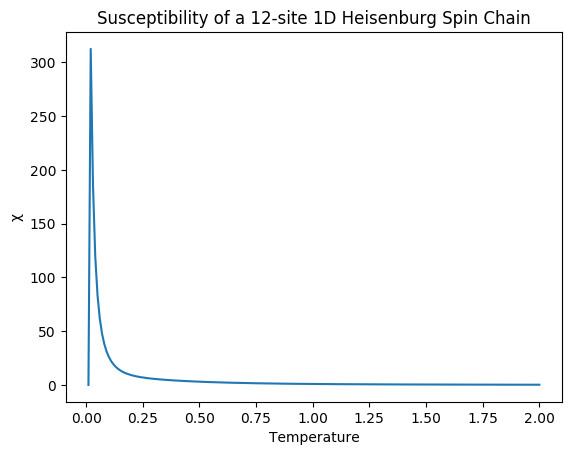

PyObject <matplotlib.text.Text object at 0x000000002BBC7828>

In [75]:
plot(T,χ)
xlabel("Temperature")
ylabel("χ")
title("Susceptibility of a 12-site 1D Heisenburg Spin Chain")

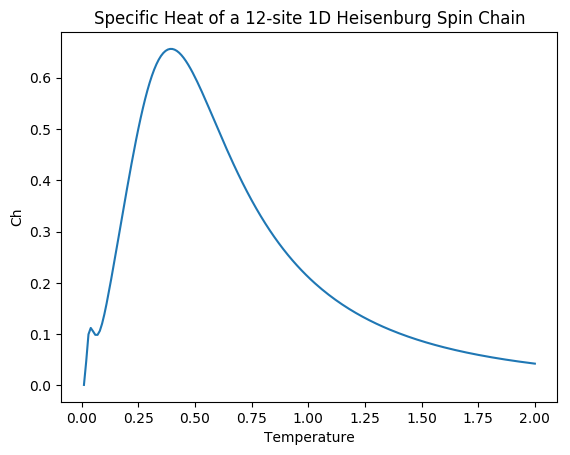

PyObject <matplotlib.text.Text object at 0x0000000029BD9A58>

In [76]:
plot(T,Ch)
xlabel("Temperature")
ylabel("Ch")
title("Specific Heat of a 12-site 1D Heisenburg Spin Chain")